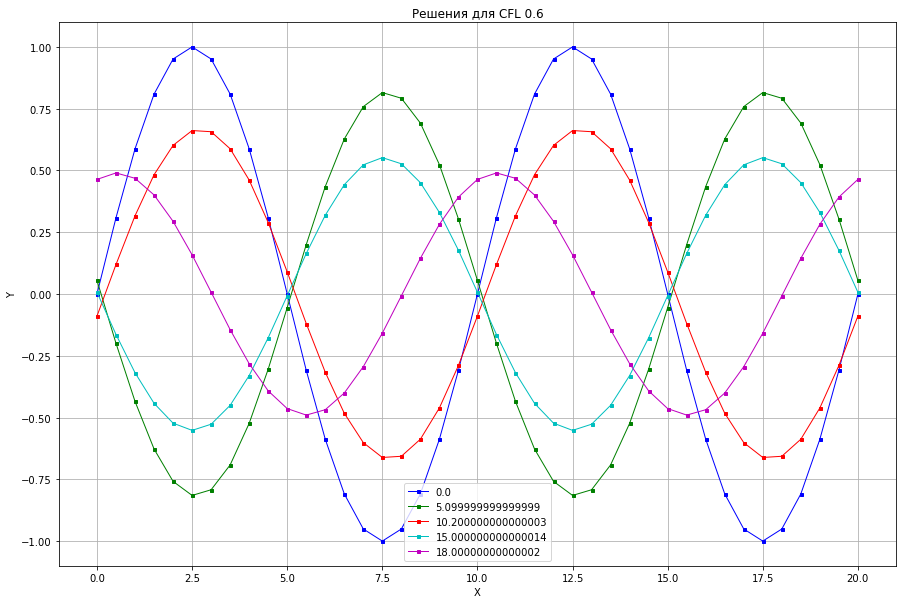

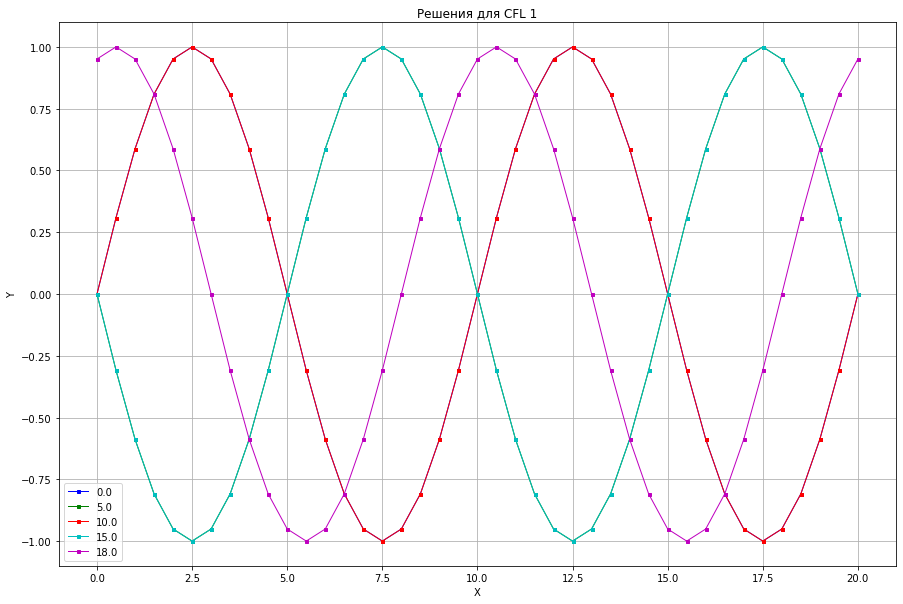

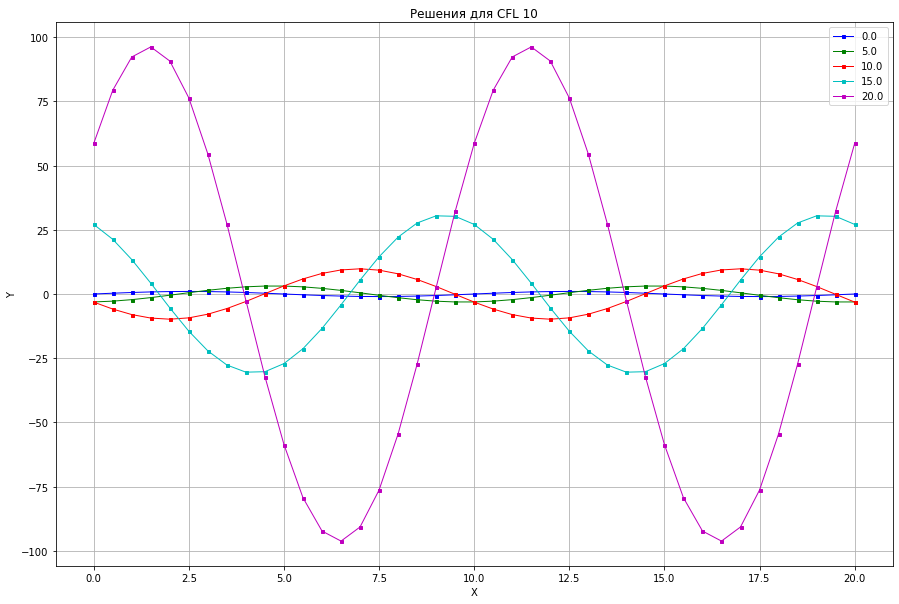

In [3]:
import numpy as np              # массивы
import matplotlib.pyplot as plt # импортируем модуль 
                                # для построения графиков
import math as m
%matplotlib inline
plt.rc('font', size=10)         # размер шрифта на графике

#ввод входных данных
L = 20  #размер области
T = 18  #время расчета
h = 0.5 #шаг по пространству 
CFL =[0.6, 1, 10] #число Куранта

for j in range(len(CFL)):
    tau = CFL[j]*h #шаг по времени
    dt_out_results = 5. #выводим результаты каждые dt_out_results секунд

    #генерация сетки
    x = np.arange(0, L+h, h)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = np.sin((4*np.pi*x[i])/L) #начальное условие
    # массивы для записи результатов
    results = np.array([])
    results_time = np.array([])
    # цикл по времени
    t = 0                # время в начале равно нулю
    time_next_output = 0 # время следующего вывода на экран

    while t < T:
        if t >= time_next_output: # запись результатов каждые dt_out_results 
                             # секунд
            results = np.append(results, y)
            results_time = np.append(results_time, t)
            time_next_output += dt_out_results
        # инкременирование времени
        t += tau
        # массив для нового слоя по времени
        y_n = np.zeros(len(x))
        # цикл по пространству
        for m in range(1, len(x)):
            y_n[m] = (tau/h)*(y[m-1]-y[m]) + y[m]
        # граничные условия
        NX = len(x)-1
        y_n[0]=y_n[NX]
        y[:]=y_n[:]
    # финальный t
    results = np.append(results, y)
    results_time = np.append(results_time, t)    
    
    plt.figure(figsize=(15, 10))
    style = ['b-s', 'g-s', 'r-s', 'c-s', 'm-s', 'y-s', 'b-s', 'g-s']
    for i in range(len(results_time)):
        plt.plot(x, results[i*len(x):(i+1)*len(x)], style[i], 
                 label=results_time[i], linewidth=1, markersize = 3)
    
    plt.grid('off')
    plt.legend()
    plt.title('Решения для CFL ' + str(CFL[j]))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    